# Plot Graph

## Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random 

## Class def

In [2]:
class GraphColoringProblem:
    def __init__(self, graph):
        self.graph = graph
        self.adjacency_matrix = nx.adjacency_matrix(graph).todense()

    def __len__(self):
        return nx.number_of_nodes(self.graph)

    def number_of_colors(self, genetic_colors_individual: list):
        '''
        genetic_colors_individual representa o individuo do algoritmo genético
        é uma lista de inteiros, de tamanho igual ao número de vertices do grafo
        e os valores nele contidos representam as cores
        '''
        return len(set(genetic_colors_individual))
    
    def get_cost(self, genetic_colors_individual):
        '''
        Calcula o custo do grafo
        se não houverem restrições, o custo será o número de cores (número cromático)
        '''
        return self.count_adjacencies_violations(genetic_colors_individual) + \
            self.number_of_colors(genetic_colors_individual)

    def count_adjacencies_violations(self, genetic_colors_individual):
        num_violations = 0
        for i in range(len(genetic_colors_individual)):
            # iterando acima da diagonal principal da matriz de adjacencia
            for j in range(i+1, len(genetic_colors_individual)):
                # se vertice i e j forem conexos, faça: 
                if self.adjacency_matrix[i, j]:
                    # se cores destes 2 vertices forem iguais, faça:
                    if genetic_colors_individual[i] == genetic_colors_individual [j]: 
                        num_violations += 1
        return num_violations

    def plot_graph(self, genetic_colors_individual):
        list_colors = list(set(genetic_colors_individual))
        colors = plt.cm.rainbow(np.linspace(0, 1, len(list_colors)))
        mapping_of_colors = []
        for i in range (self.__len__()):
            color = colors[list_colors.index(genetic_colors_individual[i])]
            mapping_of_colors.append(color)

        pos = nx.shell_layout(self.graph, rotate=0)
        nx.draw(self.graph, 
                font_weight='bold',
                node_color= mapping_of_colors)
        
        return plt

## Auxiliary functions

In [9]:
def aux_plot_graph(graph):
    gcp = GraphColoringProblem(graph)
    solution = np.random.randint(5, size=len(gcp))
    print("Cores aleatórias = ", solution)
    print("Número de cores =", gcp.number_of_colors (solution))
    print("Número de violações =", gcp.count_adjacencies_violations (solution))
    print("Custo (função objetivo) = ", gcp.get_cost(solution))
    plot = gcp.plot_graph(solution)
    plot.show()

## Examples plots

Cores aleatórias =  [4 0 3 0 1 1 0 1 2 3]
Número de cores = 5
Número de violações = 2
Custo (função objetivo) =  7


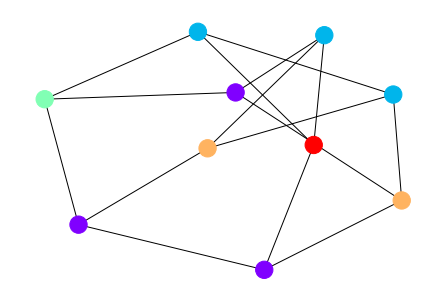

Cores aleatórias =  [0 0 4 0 1 4 2 1 1 2]
Número de cores = 4
Número de violações = 5
Custo (função objetivo) =  9


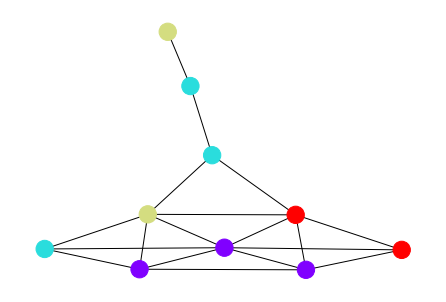

Cores aleatórias =  [4 3 2 2 2 4 4 3 2 1 0 1 3 3 4 1 2 2 1 2 4 3 0 3]
Número de cores = 5
Número de violações = 7
Custo (função objetivo) =  12


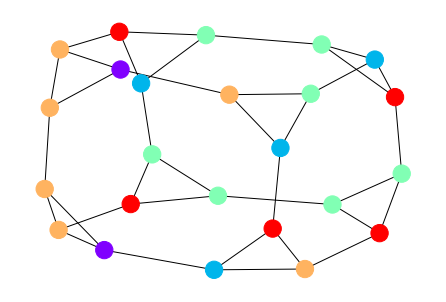

Cores aleatórias =  [4 0 2 4 4 3 3 0 1 3 1 2 0 2 4 0 4 1 3 4 2 4 4 4 0 3 2 2 4 1 0 4 0 1 0 1 1
 0 1 2 0 3 3 2 3 2]
Número de cores = 5
Número de violações = 11
Custo (função objetivo) =  16


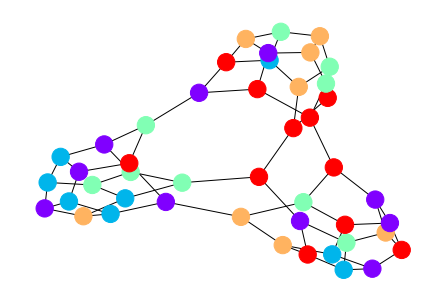

In [10]:
if __name__ == '__main__':
    aux_plot_graph(nx.petersen_graph())
    aux_plot_graph(nx.krackhardt_kite_graph())
    aux_plot_graph(nx.truncated_cube_graph())
    aux_plot_graph(nx.tutte_graph())
    

# Algorithm

[post explaining how to do it](https://www.geeksforgeeks.org/project-idea-genetic-algorithms-for-graph-colouring/)

In [5]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt

In [6]:
#graph = nx.krackhardt_kite_graph()
#graph = nx.truncated_cube_graph()
#graph = nx.tutte_graph()
graph = nx.petersen_graph()

number_of_vertices = len(graph)
gcp = GraphColoringProblem(graph=graph)


def get_cost(individual):
    return gcp.get_cost(individual),

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("integers", random.randint, 0, number_of_vertices-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.integers, number_of_vertices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", get_cost)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=number_of_vertices, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=2)

# 2

In [7]:
def graph_coloring_problem(
        population_size=100, 
        crosover_rate=0.5, 
        mutation_rate=0.2, 
        max_generations=100, 
        hall_of_fame_size=1,
        verbose=True):
    
    pop = toolbox.population(n=population_size)
    hof = tools.HallOfFame(hall_of_fame_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(
        pop, toolbox, 
        cxpb=crosover_rate, 
        mutpb=mutation_rate, 
        ngen=max_generations, 
        stats=stats,
        halloffame=hof, 
        verbose=verbose)

    
    
    return pop, log, hof

# 3

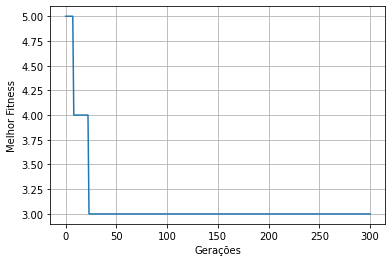

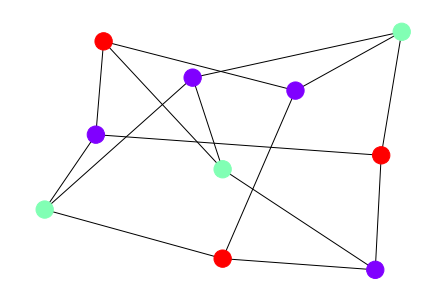

In [8]:
if __name__ == "__main__":
    random.seed(0)

    pop, log, hof = graph_coloring_problem(max_generations=300, verbose=False)

    # plot curva de convergência
    gen = log.select('gen')
    best_per_gen = log.select('min')
    fig, ax = plt.subplots()
    ax.plot(gen, best_per_gen)
    ax.grid()
    ax.set(xlabel="Gerações", ylabel="Melhor Fitness")
    plt.show()
    
    # plot melhore individuo
    gcp.plot_graph(hof.items[0])